# Ficititious Play

This note demonstrates how to use `fictplay` Python library.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import fictplay

Fictitious play is first introduced as a learning model by Brown(1951) and Robinson(1951). In fictitious play model, players choose their strategies to maximize their payoffs with the beliefs such that their opponents will play each strategy with the probability equal to its historical frequency. In this note, we focus on two-player game.

## Model

- $i = 1, 2$ : players
- $S_i$ : the finite set of pure-strategies for player $i$
    - $S = S_1 \times S_2$ : the set of pure-strategy profile
    - $s_i \in S_i$ : one of the $i$'s strategy
- $\Sigma_i$ : the set of mixed-strategies for player $i$
    - $\Sigma = \Sigma_1 \times \Sigma_2$ : the set of mixed-strategy profile
    - $\sigma_i \in \Sigma_i$ : one of the $i$'s mixed strategy
- $u_i(s_i, \sigma_{-i})$ : $i$'s expected utility if he chooses pure strategy $s_i$ and his opponents act according to $\sigma_{-i}$

After each round of play, players observe the actual actions choosen by opponents, and they choose strategies in the next round given histories of opponents actions. When a player choose a mixed strategy, its mixing is not observed, that is, histories of play consist of pure-strategy profiles.

- $t = 1, 2, \cdots$: dates
- $s^{\tau} \in S$ : strategy profile at date $\tau$
- $\zeta^t = (s^1, \cdots, s^{t-1})$ : history of play up to $t$
    - $\zeta^1$ indicates null history
- $\mathcal{Z}^t$ : the set of all histories of play up to $t$
    - by construction, $\mathcal{Z}^1$ is the singleton set consisting of the null history
    - $\mathcal{Z}$ : the set of all possible infinite histories
- $\kappa(\zeta^t)(s_i)$ : the number of times that $i$ played $s_i$ in the $t-1$ observations that comprise $\zeta^t$
    - player $i$ has an exogenous initial weight function $\kappa_i(\zeta^1) : S_{-i} \rightarrow \mathcal{R}_+$

Weight function is updated by adding 1 to the weight of each opponent strategy each time it is played so that:

\begin{equation}
\kappa_i(\zeta^t)(s_{-i}) = \kappa_i(\zeta^{t-1})(s_{-i}) + \left\{ \begin{array}{ll}
    1 & (s_{-i}^{t-1} = s_{-i}) \\
    0 & (s_{-i}^{t-1} \neq s_{-i})
  \end{array} \right.
\end{equation}

Each player assesses concerning the behavior of his opponents at each date and contingent on history

- $\mu_i^t : \mathcal{Z}^t \rightarrow \Sigma_{-i}$ : $i$'s assessment over the possible pure-strategy profiles that hisopponents will choose at date $t$

Then, $\mu_i$ is given by normalizing the $\kappa_i$, that is,

\begin{equation}
\mu_i^t (\zeta^t)(s_{-i}) = \frac{\kappa_i (\zeta^t)(s_{-i})}{\sum_{\tilde{s}_{-i} \in S_{-i}}\kappa_i (\zeta^t)(\tilde{s}_{-i})}
\end{equation}

Each player takes best response, which is a maximizer of 

\begin{equation}
\sum_{s_{-i} \in S_{-i}} u_i(\sigma_i, s_{-i}) \mu_i^t (\zeta^t)(s_{-i})
\end{equation}

over all $\sigma_i \in \Sigma_i$

It is well known that if fictitious play converges to some distribution, those possibilities correspond to Nash equilibrium. However, fictitious play does not always converge. It converges to Nash equilibrium for a two-player game when, for example

- Both players have finite strategies and the game is a zero-sum game
- The game is a potential game
- The game is solvable by IESDS
- The game has an interior ESS
- The game is supermoduler game and satisfies some assumptions

## `FictitiousPlay` class

The `FictitiousPlay` class requires **payoff matrix**, which must be either 2-dimentional numpy array or `NormalFormGame` object.

### Creating `FictitiousPlay` class

Let's create the `FictitiousPlay` class with the following **matching pennies** payoff matrix

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 1, -1          |    -1, 1   
 $B$           | -1, 1          |   1, -1     

In [2]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
fp0 = fictplay.FictitiousPlay(matching_pennies)

`N` attribute returns the number of players in this game

In [3]:
fp0.N

2

`players` attribute returns the tuple of `Player` instances of this game

In [4]:
fp0.players

(Player in a 2-player normal form game, Player in a 2-player normal form game)

`nums_actions` attribute returns the tuple of the number of actions for each player

In [5]:
fp0.nums_actions

(2, 2)

### Initializing `current_actions` and `current_beliefs`

Initially, `current_actions` is zero vector

In [6]:
fp0.current_actions

array([0, 0])

`current_actions` consists of random numbers

In [7]:
fp0.current_assessments

(array([[-0.00000000e+000,  1.49457426e-154]]),
 array([[-0.00000000e+000,  1.49457426e-154]]))

To initialize `current_actions`, we can use `set_init_actions` method.

In [8]:
init_actions = [1,0]
fp0.set_init_actions(init_actions)

In [9]:
fp0.current_actions

array([1, 0])

When you initialize the `current_actions`, you simultaneously initialize `current_beliefs`

In [10]:
fp0.current_assessments

(array([[1., 0.]]), array([[0., 1.]]))

If `init_actions` is None, `set_init_actions` method randomly sets the `current_actions` and `current_beliefs`

In [11]:
fp0.set_init_actions(init_actions=None)

In [12]:
fp0.current_actions

array([0, 1])

In [13]:
fp0.current_assessments

(array([[0., 1.]]), array([[1., 0.]]))

## Simulations

### Two-Action Games

Consider the fictitious play model with **matching pennies** game defined above.

In [14]:
matching_pennies = [[( 1, -1), (-1,  1)],
                    [(-1,  1), ( 1, -1)]]
mp = fictplay.FictitiousPlay(matching_pennies)

Let's simulate how players' beliefs converge to some distribution. 

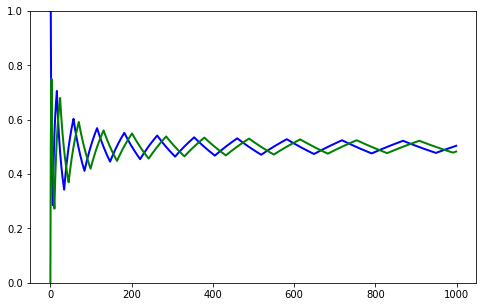

In [15]:
ts_length = 1000
assessment_sequences = mp.get_time_series(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
for assessment_sequence in assessment_sequences:
    ax.plot(assessment_sequence[0][:, 1], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

Horizontal and vertical axis correspond to the period and the player's belief for his opponent's first action. Blue(Green) line represents first(second) player's belief.

As shown in the above graph, both players' beliefs converge to $0.5$, which is the mixed-strategy Nash equilibrium of the original game.

### Three-Action Games

Next, let's consider the fictitious play model  with 3 actions.

First, define the function for drawing the graph.

In [16]:
def customize_ax(ax):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xticks((0, 0.25, 0.5, 0.75, 1))
    ax.set_yticks((0.25, 0.5, 0.75))
    ax.set_zticks((0, 0.25, 0.5, 0.75, 1))
    ax.set_aspect('equal')
    ax.view_init(ax.elev, 45)
    
def plot3d(assessment_sequences, mult_subplots=False, figsize=(12, 7.5)):
    player_ind = [0, 1]
    fig = plt.figure(figsize=figsize)
    colors = ['b', 'r']
    
    if mult_subplots:
        axes = [fig.add_subplot(1, 2, i+1, projection='3d') for i in player_ind]
    else:
        axes = [fig.add_subplot(111, projection='3d')] * 2
    
    for i, color in zip(player_ind, colors):
        axes[i].scatter(assessment_sequences[i][:, 0],
                        assessment_sequences[i][:, 1],
                        assessment_sequences[i][:, 2],
                        c=color, s=60)
        customize_ax(axes[i])

    plt.show()

Consider the fictitious play model of **shapley game** whose payoff matrix is

1$\backslash$2 | $A$           | $B$    |$C$
 ------------- |---------------| ---------|-----------
 $A$           | 0, 0          |    1, 0   |   0,1
 $B$           | 0, 1          |   0, 0   |    1,0
 $C$           |1,0           | 0,1      | 0,0

In [17]:
shapley_game = [[(0, 0), (1, 0), (0, 1)],
                [(0, 1), (0, 0), (1, 0)],
                [(1, 0), (0, 1), (0, 0)]]
sg = fictplay.FictitiousPlay(shapley_game)

In [18]:
sg.players

(Player in a 2-player normal form game, Player in a 2-player normal form game)

In [19]:
sg.nums_actions

(3, 3)

Let's simulate the convergence of players' beliefs in this model.

In [20]:
ts_length = 1000
assessment_sequences = sg.get_time_series(ts_length, init_actions=(0, 1))

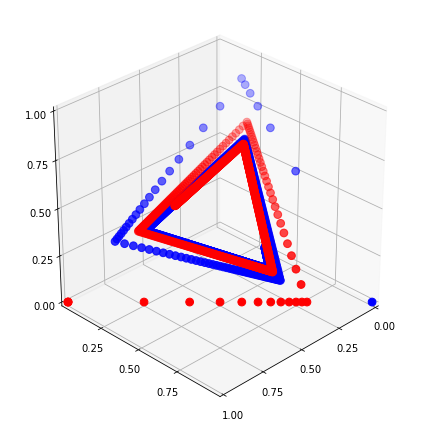

In [21]:
plot3d((assessment_sequences[0][0][0:], assessment_sequences[1][0][0:]))

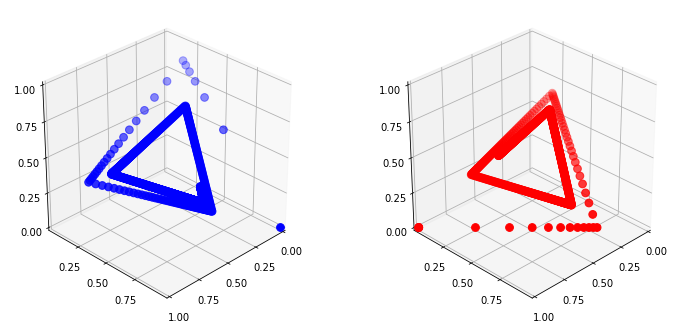

In [22]:
plot3d((assessment_sequences[0][0][0:], assessment_sequences[1][0][0:]), mult_subplots=True)

X-axis(bottom right), y-axis(bottom left) and z-axis(vertical axis) correspond to player's belief for opponent's first, second third action respectively.
Blue(Red) points represent first(second) player's belief at each period for opponent's action.

Shapley(1964) showed that in the normal fictitious play (not weighted fictitious play) if $(A, B)$ is choosen in the first period, then players' beliefs do not converge. In addition, the fictitious play follows the cycle $(A, B) \rightarrow (A, C) \rightarrow (B, C) \rightarrow (B,A) \rightarrow (C,A) \rightarrow (C, B) \rightarrow (A, B) \rightarrow \cdots$

---

# Stochastic Fictitious Play

Stochastic fictitious play is first introduced by Fundenberg and Kreps(1993). In this model, each player's payoff is perturbed in each period by a random shock.

## Model

Almost all of the settings are same as original fictitious play model except for paerturbated payoff. Player's payoff at period $t$ is given by 

\begin{equation}
u_i^t (s_i^t, s_{-i}^t) + \eta_i(s_i^t)
\end{equation}

The random payoff shock $\eta_i$ is observable for each $i$, but player $i$ cannot observe opponents' payoff shock and its history. Let $\rho_i$ denote the probability distribution of each $\eta_i$ and $E_i$ denote the support of $\rho_i$.

In each period, players choose their strategy after observing payoff shock, so in the stage game strategy for each player is a mapping form $E_i$ to $S_i$. Note that we do not need to consider mixed startegies in this augmented game.

Fundenberg and Kreps(1993) showed that in any $2 \times 2$ game that has a unique completely mixed Nash equilibrium, stochastic fictitious play converges with probability 1 with some assumptions.

In adddition, Hofbauer and Sandholm (2002) showed that in (i) two-player symmetric game with an interior ESS (ii) two-player zero sum game, and some game classes, stochastic fictitious play converges.

## `StochasticFictitiousPlay` class

`fictplay` module also provides `StochasticFictitiousPlay` class. In this class, each payoff shock follows same distribution, **gumbel distribution** or **standard normal distribution**, that is, $\eta_i(\cdot) \sim Gumbel(\mu, \beta)$ or $\eta_i(\cdot) \sim N(0, 1)$ for all $i$. $\eta_i(s_i)$ ($i = 1,2$, $s_i \in S_i$) are independent and identically distributed.

## Simulations

Let's simulate stochastic fictitious play model. We set the distribution of payoff shock to Type 1 extreme distribution in the next two examples.

### Two-Action Game

First, we consider matching penny game defined above.

In [23]:
mp_s = fictplay.StochasticFictitiousPlay(matching_pennies)

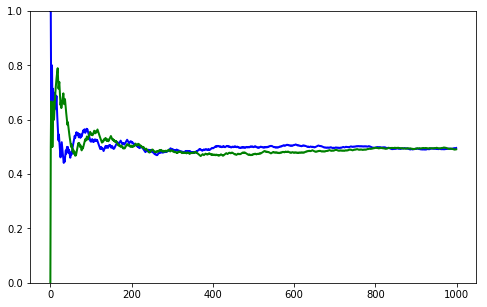

In [24]:
ts_length = 1000
assessment_sequences = mp_s.get_time_series(ts_length)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_prop_cycle('color', ['b', 'g'])
for assessment_sequence in assessment_sequences:
    ax.plot(assessment_sequence[0][:, 1], linewidth=2)
ax.set_ylim(0, 1)
plt.show()

As shown in the above graph, both players' beliefs converge to  $0.5$ , which is the mixed-strategy Nash equilibrium of the original game. This result is consistent with Fudenberg and Kreps(1993). Combining with the result of standard fictitious play, in matching penny game, beliefs converges under both standard and stochastic fictitious play model. 

### Three-Action Game

Next, we consider shapley game discussed above.

In [25]:
sg_s = fictplay.StochasticFictitiousPlay(shapley_game)

In [26]:
ts_length = 1000
assessment_sequences = sg_s.get_time_series(ts_length, init_actions=(1, 0))

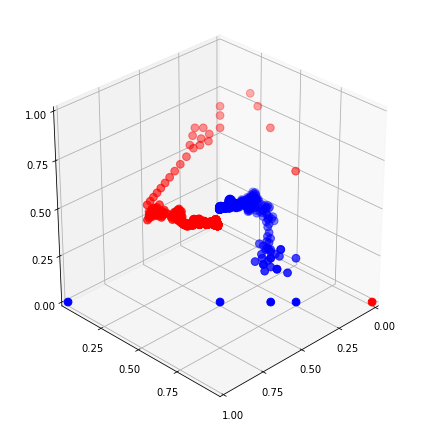

In [27]:
plot3d((assessment_sequences[0][0][0:], assessment_sequences[1][0][0:]))

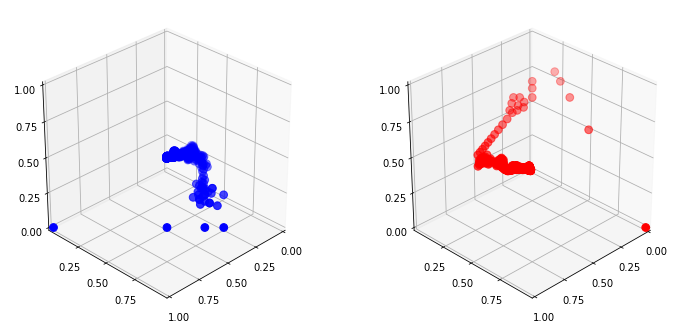

In [28]:
plot3d((assessment_sequences[0][0][0:], assessment_sequences[1][0][0:]), mult_subplots=True)

Stochastic fictitious play converges to $(1/3, 1/3, 1/3)$ which is a mixed Nash equilibrium of this game. This  is consistent with the result of Hofbauer and Sandholm (2002) since $(1/3, 1/3, 1/3)$ is an interior ESS and a unique equilibrium. This result is quite different from the result of standard fictitious play model where shapley game does not converge. But Williams(2018) shows that if the variance of shocks is small, namely $\sigma < 0.0821$ in the normal case and $\lambda > 6$ in the logit case, this equilibrium is unstable.

---

# N-player  Game

So far, we consider two-player games with two or three actions for each player. We can extend the fictitous play model  to more general games where there are n players. Monderer and Shapley(1996) shows that in the game with identical payoff functions, players' beliefs converge.

Note that fictitious player game with n players is different from the literature in the sense that players' beliefs are updated simply. That is, player  i 's belief for player  j  depends only on past player  j 's actions, not on other players' actions.

## Simulation

Consider three-player game with identical payoff functions.

In [136]:
from normal_form_game import NormalFormGame

In [154]:
g = NormalFormGame((2,2,2))
print(g)

3-player NormalFormGame with payoff profile array:
[[[[0., 0., 0.],   [0., 0., 0.]],
  [[0., 0., 0.],   [0., 0., 0.]]],

 [[[0., 0., 0.],   [0., 0., 0.]],
  [[0., 0., 0.],   [0., 0., 0.]]]]


In [155]:
g[0,0,0] = 1,1,1
g[0,0,1] = -1,-1,-1
g[0,1,0] = -1,-1,-1
g[0,1,1] = 1,1,1
g[1,0,0] = -1,-1,-1
g[1,0,1] = 1,1,1
g[1,1,0] = 1,1,1
g[1,1,1] = -1,-1,-1
print(g)

3-player NormalFormGame with payoff profile array:
[[[[ 1.,  1.,  1.],   [-1., -1., -1.]],
  [[-1., -1., -1.],   [ 1.,  1.,  1.]]],

 [[[-1., -1., -1.],   [ 1.,  1.,  1.]],
  [[ 1.,  1.,  1.],   [-1., -1., -1.]]]]


Create a `FictitiousPlay` class with this payoff matrix, and get time series of players' beliefs.

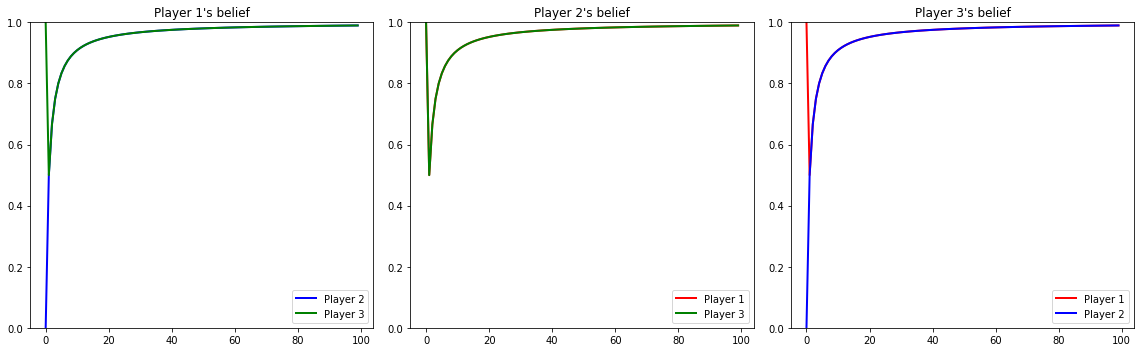

In [157]:
game = fictplay.FictitiousPlay(g)
ts_length = 100
init_actions = (0,1,0)
assessment_sequences = game.get_time_series(ts_length, init_actions)

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.plot(assessment_sequences[0][0][:,0], linewidth=2,label="Player 2",color='b')
ax1.plot(assessment_sequences[0][1][:,0], linewidth=2,label="Player 3",color='g')
ax1.set_ylim(0, 1)
ax1.set_title("Player 1's belief")
ax1.legend(loc="lower right")

ax2.plot(assessment_sequences[1][0][:,0], linewidth=2,label="Player 1",color='r')
ax2.plot(assessment_sequences[1][1][:,0], linewidth=2,label="Player 3",color='g')
ax2.set_ylim(0, 1)
ax2.set_title("Player 2's belief")
ax2.legend(loc="lower right")

ax3.plot(assessment_sequences[2][0][:,0], linewidth=2,label="Player 1",color='r')
ax3.plot(assessment_sequences[2][1][:,0], linewidth=2,label="Player 2",color='b')
ax3.set_ylim(0, 1)
ax3.set_title("Player 3's belief")
ax3.legend(loc="lower right")

plt.tight_layout() 
plt.show()

As you see, all players' beliefs will convege.

---

# Reference

- Brown, G. W. 1951. Iterative solutions of games by fictitious play. In Activity Analysis of Production and Allocation, ed. by T.C.Koopmans. New York: Wiley.
- Robinson, J. 1951. An iterative method of solving a game. Annals of Mathmatics 54: 296-301.
- Shapley, L. 1964. Some topics in two-person games. In Advances in Game Theory, ed. by M. Drescher, L. S. Shapley, and A. W. Tucker. Princeton: Princeton University Press.
- Fudenberg, D., and D. Kreps. 1993. Learning mixed equilibria. Games and Economic Behavior 5: 320-67.
- Monderer, D., and Shapley, L. 1996. Fictitious Play Property for Games with Identical Interests. Journal of Economic Theory 68, 258-265
- Fudenberg, D., and D.K. Levine. 1998. The Theory of Learning in Games Cambridge: MIT Press.
- Hofbauer, J., and W. H. Sandholm. 2002. On the Global Convergence of Stochastic Fictitious Play. Econometrica Vol.70, No. 6: 2265-2294